In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

In [7]:
# Load the multi-layer TIFF file
multi_layer_image = tiff.imread('bibo.tif')

# Split the multi-layer TIFF into individual images
background_image = multi_layer_image[2].astype(np.float32)
imaging_beam_image = multi_layer_image[1].astype(np.float32)
absorption_image = multi_layer_image[0].astype(np.float32)

In [8]:
# Constants
image_size = background_image.shape
absorption_coefficient = 0.02
S=image_size[0]*image_size[0]*13*10e-6*13*10e-6
S=13*10e-6*13*10e-6
sigma=2*10e-13

# Calculate the optical density
up=(absorption_image-background_image)
down=(imaging_beam_image-background_image)

down[down<=0] = 0.001
up[up<=0] = 0.001
pp=down[down==0]

# optical_density = -1*np.log(up / down)
optical_density = -1 *np.log((absorption_image) / (imaging_beam_image))
print(S/sigma)
optical_density[optical_density<-0.1]=-0.1

# Subtract the background
# optical_density -= background_image

# Define pixel size and atom mass (customize these values)
pixel_size = 13  # micrometers per pixel
atom_mass = 1.67*88e-27  # mass of a single atom (in kilograms)

# Calculate the number of atoms in the cloud
cloud_density = optical_density / (absorption_coefficient * pixel_size)
number_of_atoms = np.sum(cloud_density) * atom_mass

8450.000000000002


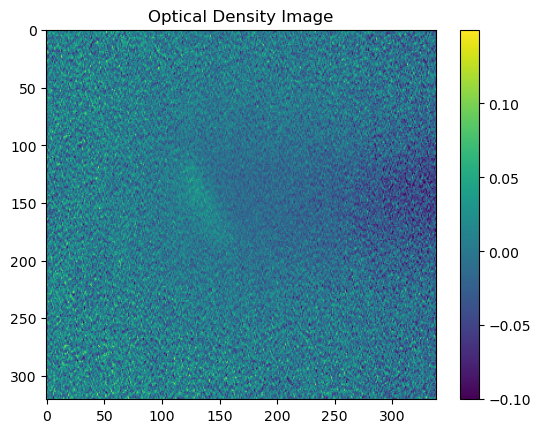

Number of atoms in the cloud: -8.33e-23


In [9]:
# Plot the optical density
plt.imshow(optical_density, cmap='viridis')
plt.colorbar()
plt.title('Optical Density Image')
plt.show()

print(f"Number of atoms in the cloud: {number_of_atoms:.2e}")

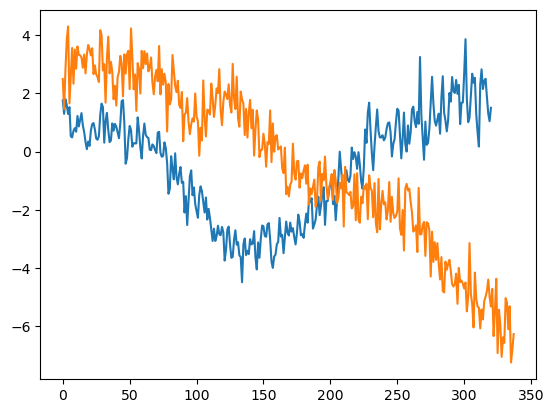

In [10]:
a=np.sum(optical_density,axis=1)
b=np.sum(optical_density,axis=0)


# # plt.imshow(down)
# print(absorption_image.dtype)

# plt.imshow(absorption_image-background_image, cmap='viridis')
# plt.colorbar()
# plt.show()

# plt.imshow(imaging_beam_image-background_image, cmap='viridis')
# plt.colorbar()
# plt.show()

# plt.imshow((absorption_image)/(imaging_beam_image), cmap='viridis')
# plt.colorbar()
# plt.show()

# plt.imshow(up, cmap='viridis')
# plt.colorbar()
# plt.show()

# plt.imshow(down, cmap='viridis')
# plt.colorbar()
# plt.show()

# plt.imshow(up/down, cmap='viridis')
# plt.colorbar()
# plt.show()

plt.plot(a)
plt.plot(b)